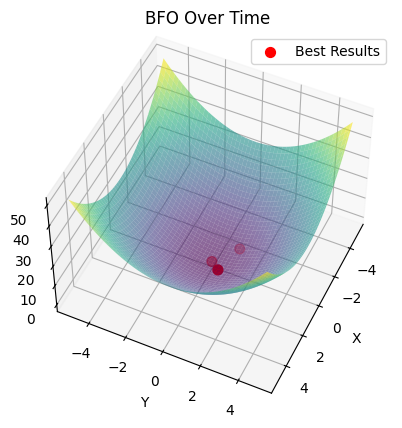

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the sphere function
def sphere(x, y):
    return x**2 + y**2

# Function to plot sphere surface with points
def plot_sphere_with_points(x_points, y_points, z_points, name='sphere'):
    # Generate data points for the surface
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = sphere(x, y)

    # Plot the surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)

    # Scatter plot the new points
    ax.scatter(x_points, y_points, z_points, color='red', s=50, label='Best Results')

    # Customize the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'BFO Over Time')
    ax.legend()

    # Adjusting view angle for better visibility of the points
    ax.view_init(elev=50, azim=25)

    # Show the plot
    plt.show()
    
    # save the plot
    fig.savefig(f'../output/plots/{name}.png')

# Example usage
x_points = np.array([0.09220294, 0.5, -1.0])
y_points = np.array([-0.01801783, 0.5, 1.0])
z_points = sphere(x_points, y_points)

plot_sphere_with_points(x_points, y_points, z_points)


In [4]:
import pandas as pd

df = pd.read_csv('../output/bfo.csv')

In [5]:
df["j_k_l"] = (df["l"] * 1000) + (df["k"] * 100) +  (df["j"] * 10)

In [6]:
df.sort_values(by=['j_k_l'], inplace=True)

In [7]:
df["j_k_l"].unique()

array([   0,   10,   20,   30,   40,  100,  110,  120,  130,  140,  200,
        210,  220,  230,  240,  300,  310,  320,  330,  340, 1000, 1010,
       1020, 1030, 1040, 1100, 1110, 1120, 1130, 1140, 1200, 1210, 1220,
       1230, 1240, 1300, 1310, 1320, 1330, 1340])

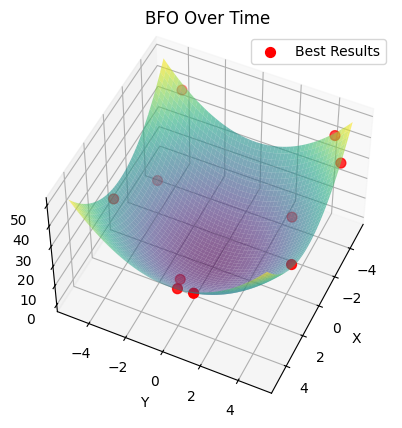

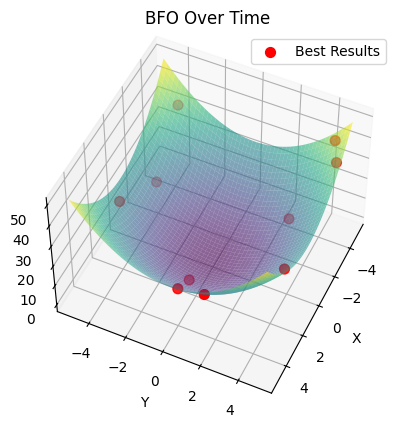

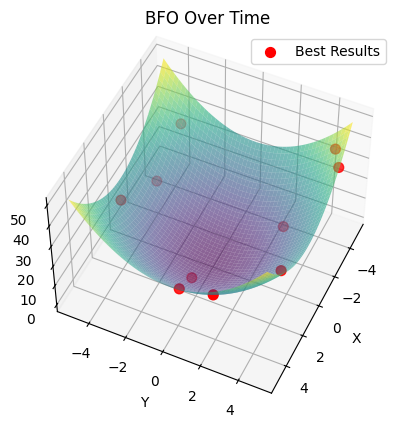

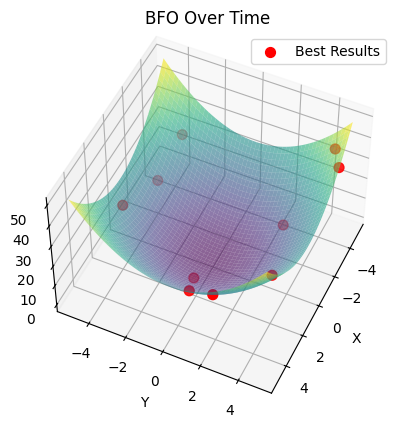

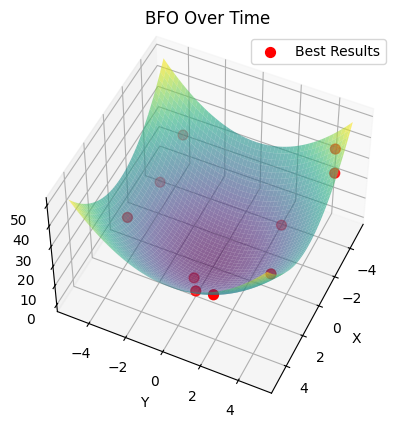

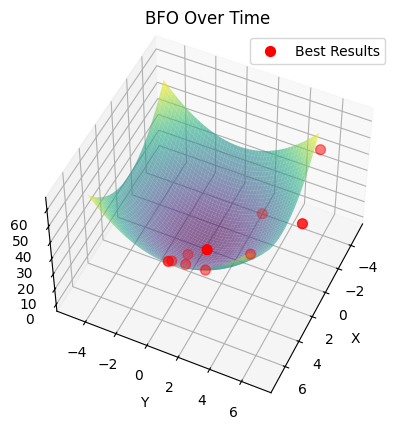

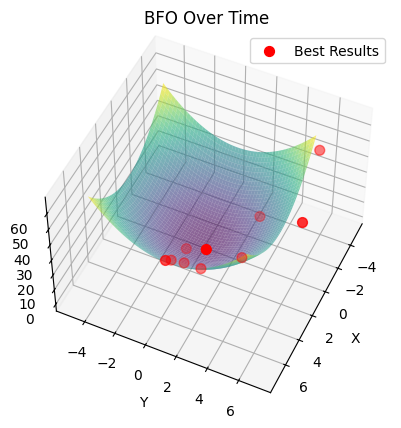

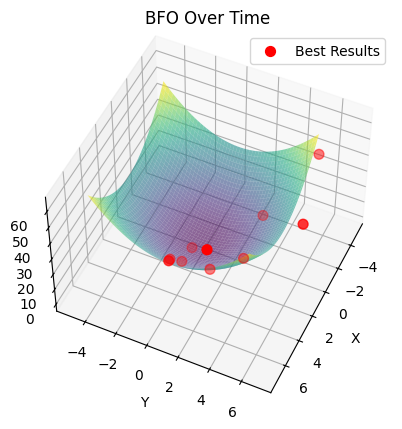

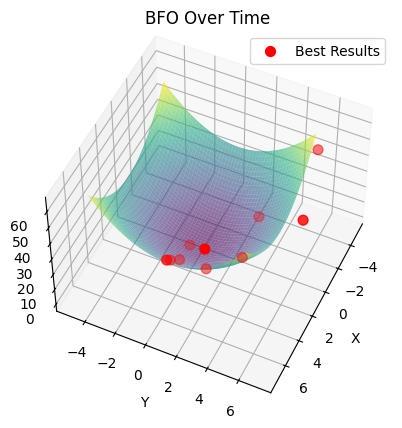

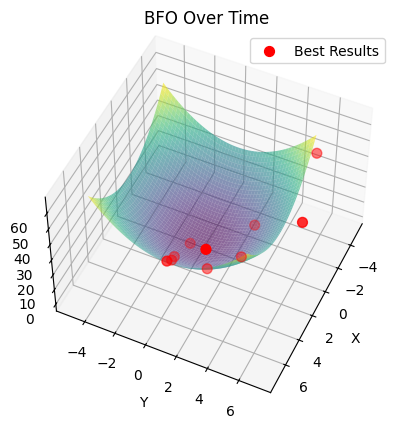

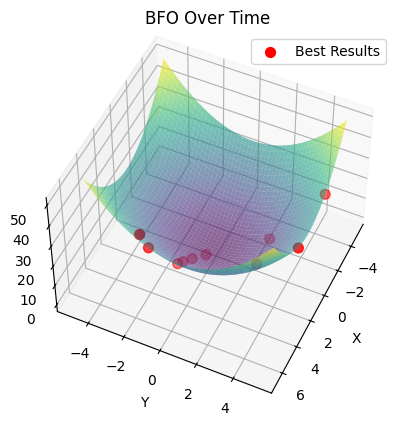

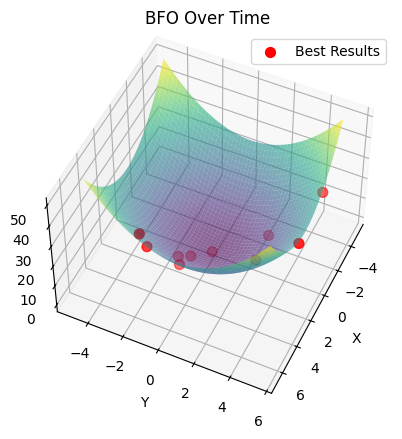

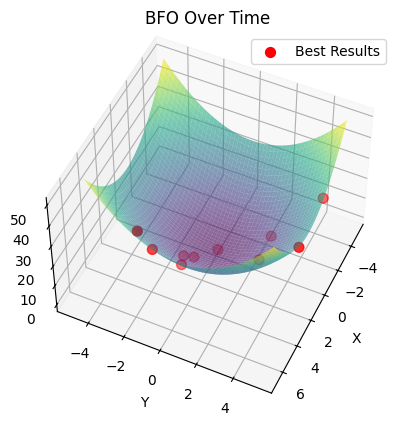

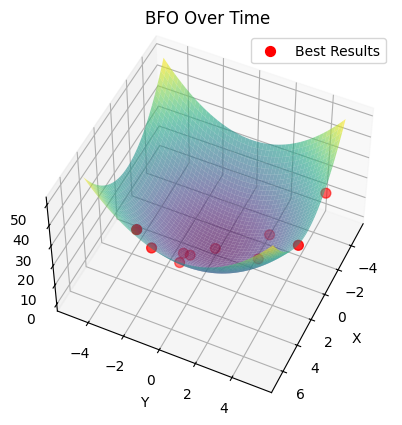

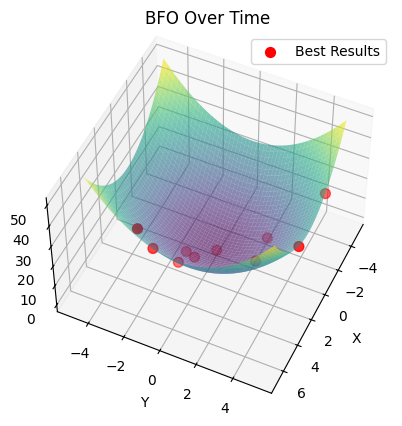

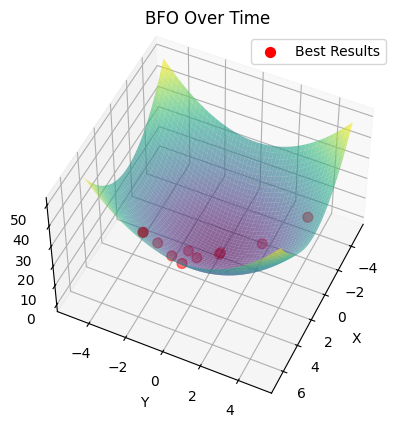

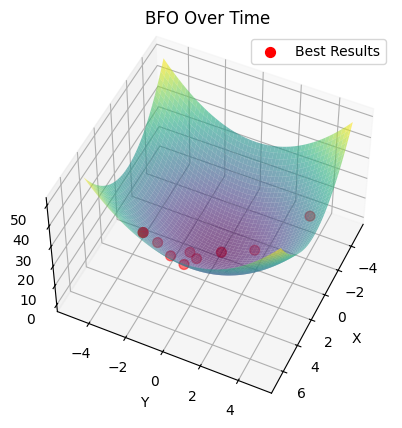

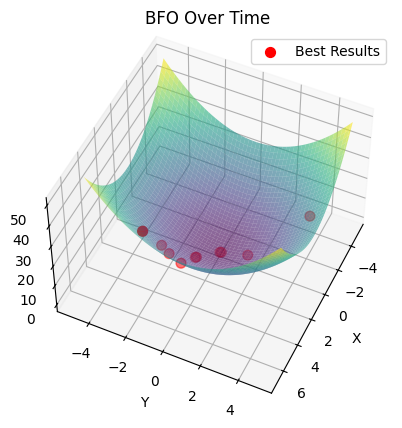

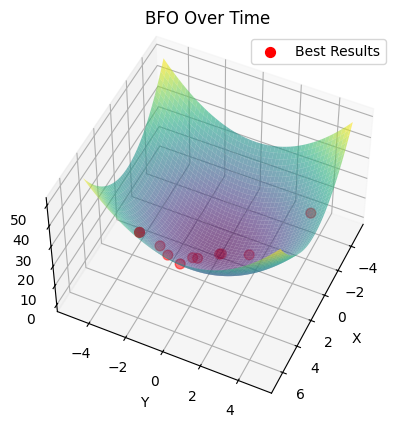

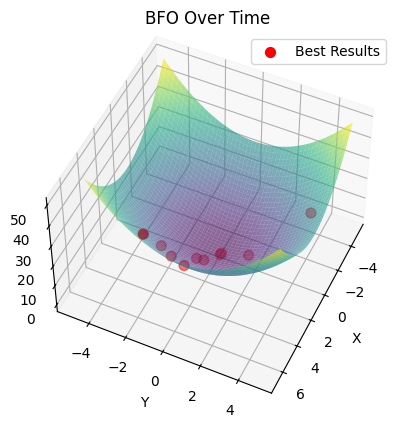

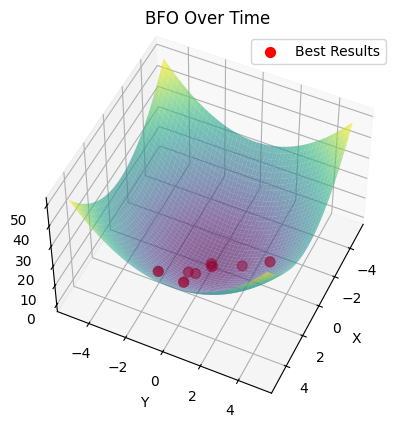

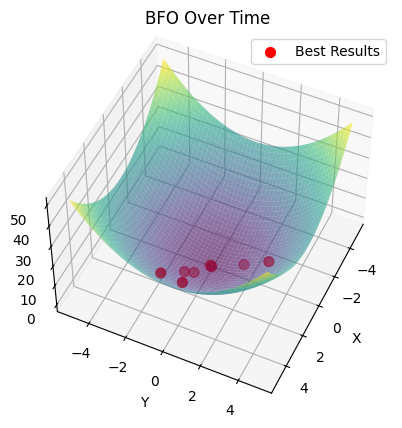

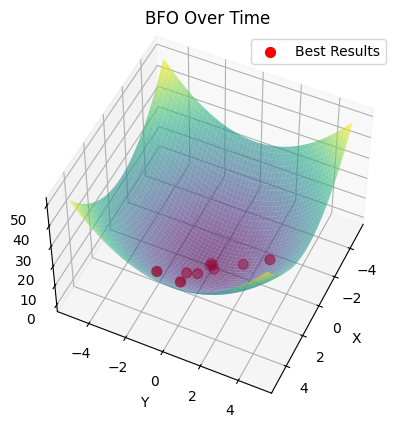

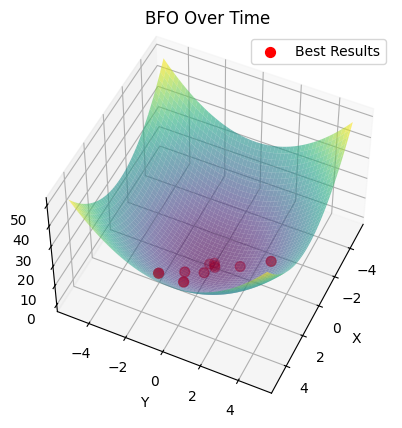

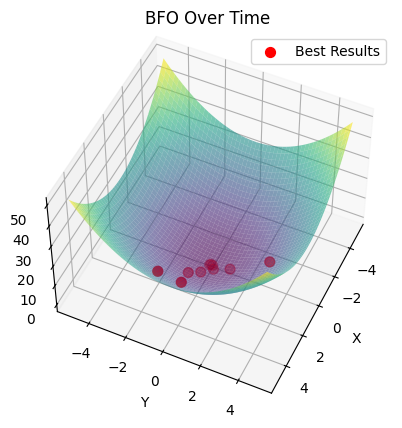

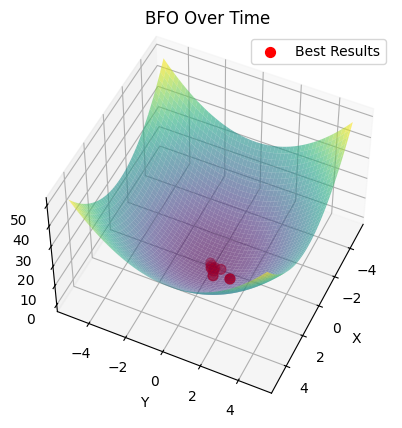

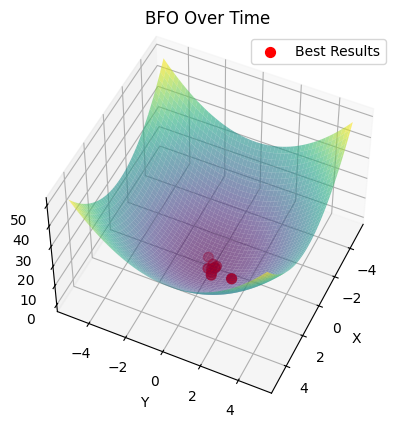

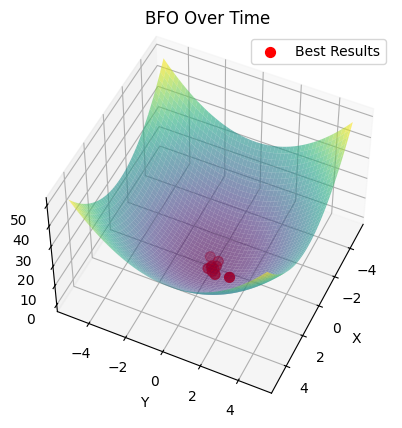

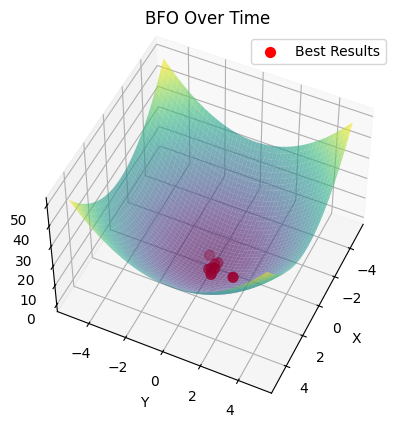

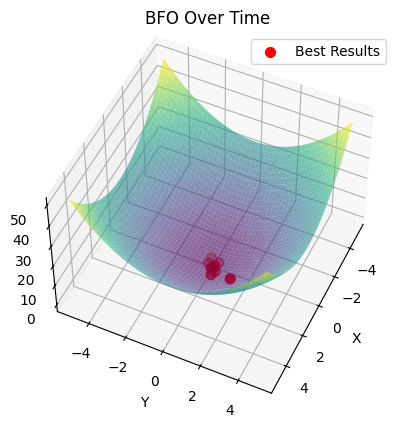

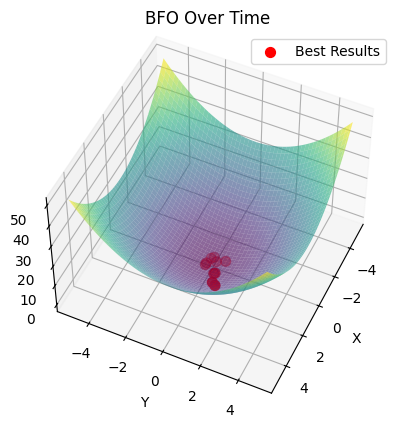

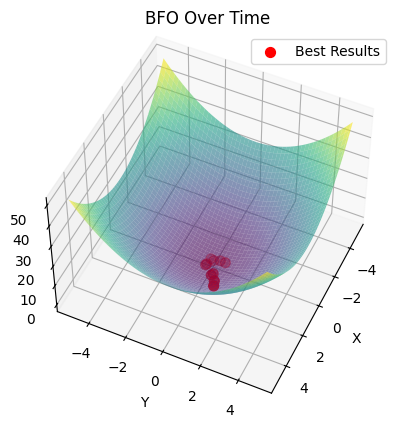

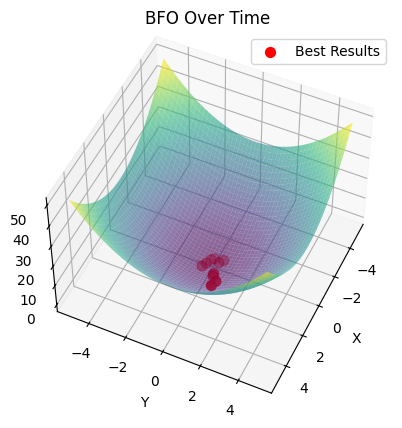

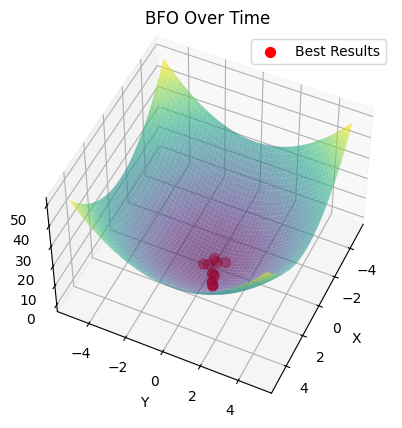

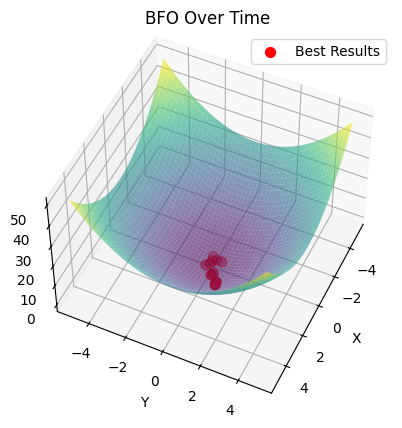

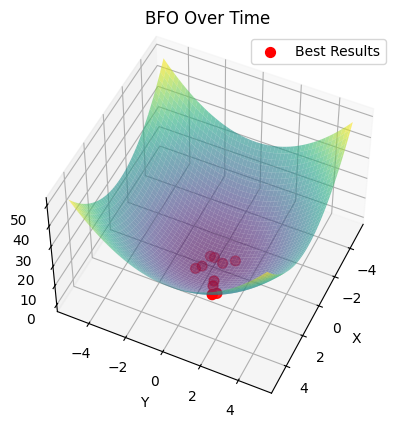

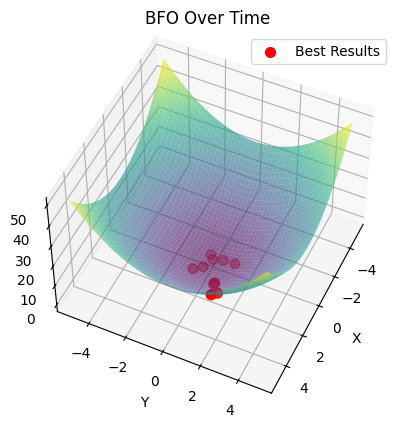

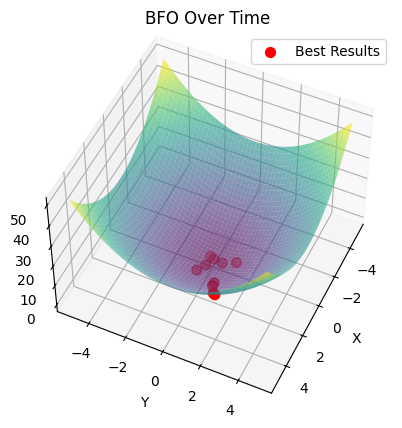

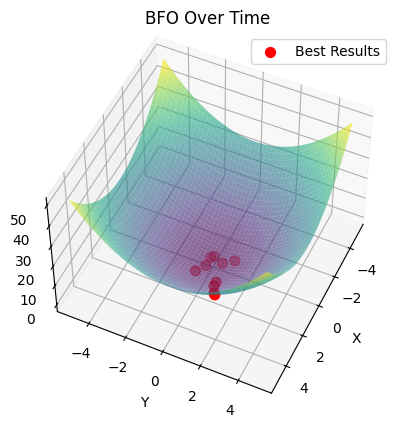

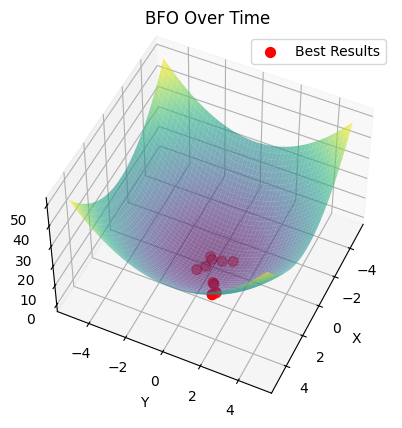

In [8]:
from time import sleep

# For each j_k_l, iterate over the rows and plot the points
for j_k_l in df["j_k_l"].unique():
    data = df[df["j_k_l"] == j_k_l]
    data = data.sort_values(by=['i'])
    x_points = data["x"].values
    y_points = data["y"].values
    z_points = data["cost"].values
    plot_sphere_with_points(x_points, y_points, z_points, name=f'i_{j_k_l}')
    sleep(1)
